## Demo for learning single channel PSF from SMLM data

##### Setup environment

In [1]:
import sys
sys.path.append("..")
from psflearning.psflearninglib import psflearninglib
from psflearning import io
from psflearning.makeplots import *

##### Create psflearning object and load the config file
$\small\color{skyblue}{\mathrm{basefile}}$: config file with all parameters  
$\small\color{skyblue}{\mathrm{sysfile}}$: config file with microscope specific parameters  
For advanced user, pass in base file only as below to interact with all parameters:   
```python
    L.param = io.param.combine('config_base')
```

In [2]:
L = psflearninglib()
L.param = io.param.combine(basefile='config_base',psftype='insitu',channeltype='1ch',sysfile='M2')

##### Edit user defined parameters

In [3]:
L.param.datapath = 'E:/EMBL files/data 2022/230202_Nup96SNAP_NC_M2/Nup96SNAP_BME_i50SM_ex200_zpos5um_NC_1/'
L.param.savename = L.param.datapath + 'psfmodel_iter'
L.param.keyword = 'Default.' # keyword of the file name or the full file name without extension
L.param.gain = 0.2
L.param.ccd_offset = 398.6
L.param.option.insitu.stage_pos = 5 # micron, stage position relative to infocus at the coverslip

Optional parameters, change cell type to $\small\color{#318CE7}{\mathrm{Python}}$ to activate the cell  
Parameter | Options | Default
--- | --- | ---
$\small\color{skyblue}{\mathrm{PSFtype}}$   | `'insitu_zernike', 'insitu_pupil'` | `'insitu_zernike'`
$\small\color{skyblue}{\mathrm{const\_pupilmag}}$ | `True`, `False` | `False`

$\small\color{skyblue}{\mathrm{init\_pupil\_file}}$ :  Full path to the .h5 file from bead PSF learning, Make sure the bead PSF varies in the correct axial direction, this usually requires setting the parameter $\small\color{skyblue}{\mathrm{stage\_mov\_dir}}$ to `'reverse'` during bead PSF learning

In [4]:
L.param.PSFtype = 'insitu_zernike'
L.param.option.model.const_pupilmag = False 
L.param.option.model.init_pupil_file = r'E:\EMBL files\data 2022\230202_Nup96SNAP_NC_M2\beads_30ms_conventional\30ms_conventional\psfmodel_zernike_single.h5' 

##### Start learning

In [ ]:
images = L.load_data()
L.getpsfclass()
dataobj = L.prep_data(images)
resfile = L.iterlearn_psf(dataobj,time=0)

##### Show results

In [12]:
f,p = io.h5.load(resfile) # load result file

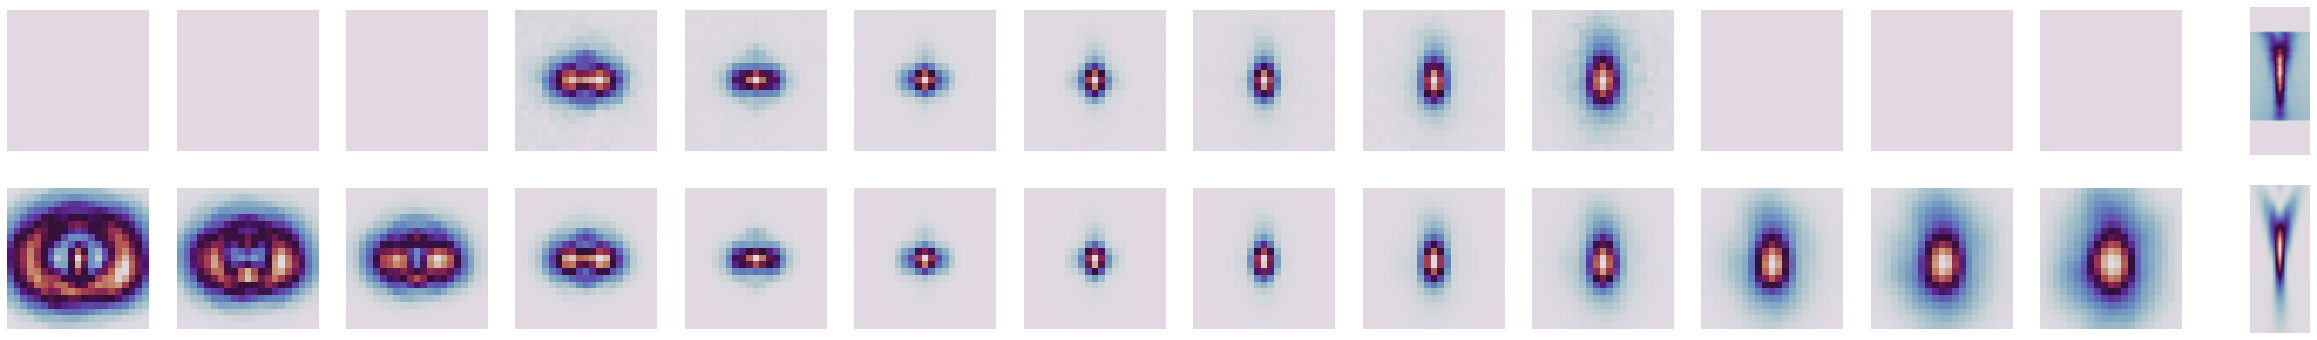

In [13]:
showpsfvsdata_insitu(f,p)

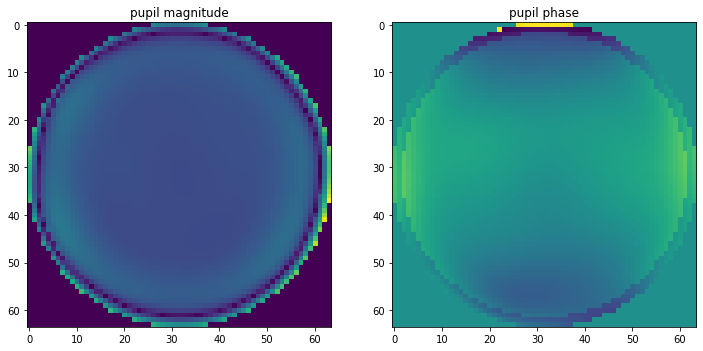

In [8]:
showpupil(f,p)

##### Optional plots

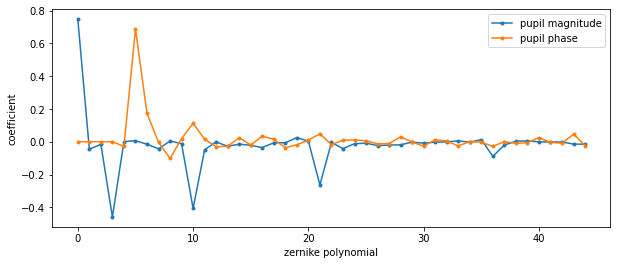

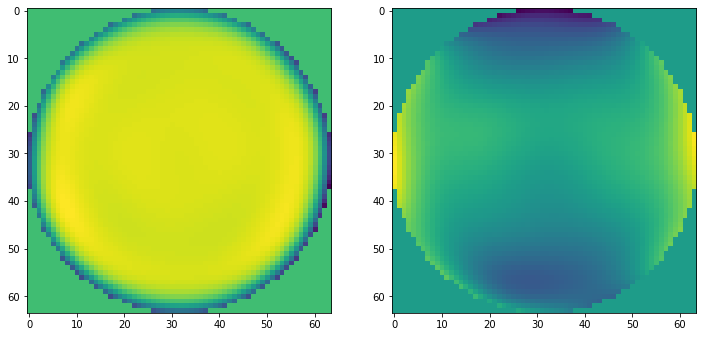

In [9]:
try:
    showzernike(f,p)
except:
    print('no Zernike coefficients')

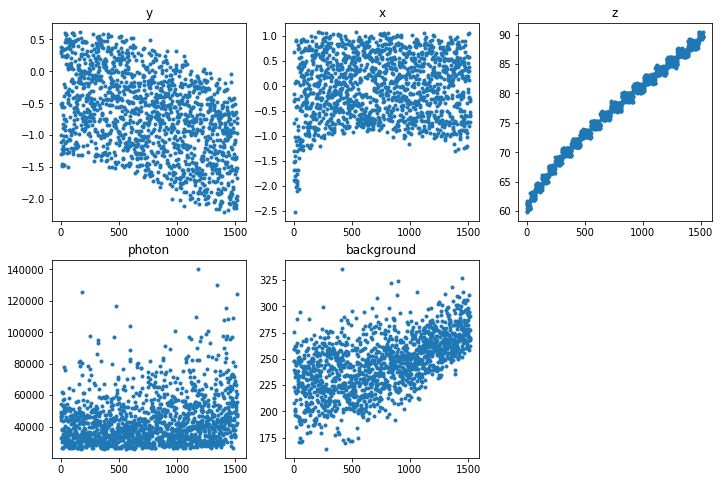

In [10]:
showlearnedparam_insitu(f,p)